**Data Preprocessing**

Install Package

In [1]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=4d582b6ea88aa2c7aa352cd838b9a0a22d3894a71945d88ed98d7bfdf6e3ccad
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


Import Library

In [2]:
#Mengimpor library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import pingouin as pg
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from wordcloud import WordCloud

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Data

In [4]:
df = "/content/drive/MyDrive/MBKM/kuesioner.xlsx" 
data = pd.read_excel(df)
data.head()

,Timestamp,Divisi,Status Karyawan,Tahun Lahir (yyyy),Tahun Masuk di 247 (yyyy),Status Pernikahan,Pendidikan terakhir,Gender,Darimana lokasi anda bekerja?,Domisili,...,"HRD memberitahukan mengenai hak cuti karyawan, permohonan slip gaji, permohonan reset password chanthel dan email, perpanjangan kontrak dan reimburse medical secara berkala (1 bulan sekali).",HRD memberikan sosialisasi berkala mengenai peraturan-peraturan yang sedang berlaku di internal perusahaan.,HRD sudah memberikan contact person terkait setiap permasalahan yang ada.,Sosialisasi yang dilakukan HRD mudah dipahami.,"Selain tersampaikannya informasi, sosialisasi diharapkan dapat membangun hubungan antara karyawan dengan HRD.",Berapakah skor yg anda berikan untuk kinerja HRD dalam memberikan sosialisasi? (1-100),Kritik untuk HRD terkait sosialisasi,Saran untuk HRD terkait sosialisasi,Apakah anda puas atau tidak puas dengan layanan HRD saat ini?,Berapakah skor yang Anda berikan untuk keseluruhan kinerja layanan HRD? (1-100)
0,2023-04-06 12:56:51.249,PMO,Tetap,1977,2011,Menikah,S1,Perempuan,Hybrid,DEPOK,...,5,6,5,4,5,81,sosialisasi jarang diberikan,dilakukan sosialisasi 1 bulan sekali,Tidak Puas,73.166667
1,2023-04-06 13:01:52.588,PMO,Tetap,1982,2011,Menikah,S1,Laki - Laki,Hybrid,KLATEN,...,5,4,5,4,5,76,informasi peraturan kurang tersampaikan,info peraturan bisa disampaikan melalui telegram,Tidak Puas,74.833333
2,2023-04-06 13:05:38.317,PMO,Kontrak,1999,2021,Lajang/Belum Menikah,SMA/SMU/SMK,Laki - Laki,Rumah,JAKARTA SELATAN,...,4,4,3,3,6,62,cp belum diberikan semuanya,cp bisa lebih diperjelas,Puas,76.166667
3,2023-04-06 13:13:49.335,PMO,Kontrak,1999,2019,Lajang/Belum Menikah,D3/D4,Perempuan,Kantor,JAKARTA SELATAN,...,5,5,4,5,6,84,cp masih ada yg belum diberitahukan,cp bisa diberitahu melalui grup,Puas,78.666667
4,2023-04-06 13:19:21.339,PMO,Tetap,1980,2011,Cerai,S1,Perempuan,Rumah,KULON PROGO,...,4,5,4,3,6,75,pemapar sosialisasi terlalu cepat,pemapar bisa pelan2 agar mudah dipahami,Tidak Puas,73.333333


In [5]:
# INFO DATAFRAME
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 82 columns):
 #   Column                                                                                                                                                                                          Non-Null Count  Dtype         
---  ------                                                                                                                                                                                          --------------  -----         
 0   Timestamp                                                                                                                                                                                       77 non-null     datetime64[ns]
 1   Divisi                                                                                                                                                                                          77 non-null     

Rename Nama Kolom

In [6]:
# Rename kolom Tahun Lahir
data.rename(columns={data.columns[3]: 'tahun_lahir'},inplace=True)

# Rename kolom Lokasi Kerja
data.rename(columns={data.columns[8]: 'Lokasi Kerja'},inplace=True)

# Rename kolom slip gaji
data.rename(columns={data.columns[11]: 'SG_cepat', data.columns[12]: 'SG_menjawab', data.columns[13]: 'SG_payroll', data.columns[14]: 'SG_pencairan', data.columns[15]: 'SG_alur', data.columns[16]: 'SG_diberikan', data.columns[17]: 'SG_permohonan', data.columns[18]: 'SG_lekasrespon', data.columns[19]: 'SG_komunikasi', data.columns[20]: 'SG_skor', data.columns[21]: 'SG_kritik', data.columns[22]: 'SG_saran'},inplace=True)

# Rename kolom pengajuan sisa cuti
data.rename(columns={data.columns[23]: 'PSC_peraturan', data.columns[24]: 'PSC_informasi', data.columns[25]: 'PSC_alur', data.columns[26]: 'PSC_pengajuan',  data.columns[27]: 'PSC_mempersilakan', data.columns[28]: 'PSC_respon', data.columns[29]: 'PSC_pertanyaan', data.columns[30]: 'PSC_komunikasi', data.columns[31]: 'PSC_infosisacuti', data.columns[32]: 'PSC_pemberitahuan', data.columns[33]: 'PSC_sesuai', data.columns[34]: 'PSC_puas', data.columns[35]: 'PSC_skor', data.columns[36]: 'PSC_kritik', data.columns[37]: 'PSC_saran'},inplace=True)

# Rename kolom perpanjangan kontrak
data.rename(columns={data.columns[38]: 'PK_memberitahu', data.columns[39]: 'PK_menjawab', data.columns[40]: 'PK_isikontrak', data.columns[41]: 'PK_email', data.columns[42]: 'PK_adenddum', data.columns[43]: 'PK_koordinasi', data.columns[44]: 'PK_skor', data.columns[45]: 'PK_kritik', data.columns[46]: 'PK_saran'},inplace=True)

# Rename kolom reimburse medical
data.rename(columns={data.columns[47]: 'RM_benefit', data.columns[48]: 'RM_alur', data.columns[49]: 'RM_memahami', data.columns[50]: 'RM_tanggap',  data.columns[51]: 'RM_bantuan', data.columns[52]: 'RM_pengajuan', data.columns[53]: 'RM_dibayarkan', data.columns[54]: 'RM_konfirmasi', data.columns[55]: 'RM_jawaban', data.columns[56]: 'RM_komunikasi', data.columns[57]: 'RM_puas',  data.columns[58]: 'RM_skor', data.columns[59]: 'RM_kritik', data.columns[60]: 'RM_saran'},inplace=True)

# Rename kolom reset password
data.rename(columns={data.columns[61]: 'RP_alur', data.columns[62]: 'RP_cp', data.columns[63]: 'RP_permohonan', data.columns[64]: 'RP_ramah',  data.columns[65]: 'RP_sehari', data.columns[66]: 'RP_cepattanggap', data.columns[67]: 'RP_proses', data.columns[68]: 'RP_skor', data.columns[69]: 'RP_kritik', data.columns[70]: 'RP_saran'},inplace=True)

# Rename kolom sosialisasi
data.rename(columns={data.columns[71]: 'SO_penting', data.columns[72]: 'SO_hak', data.columns[73]: 'SO_berkala', data.columns[74]: 'SO_cpmasalah', data.columns[75]: 'SO_dipahami', data.columns[76]: 'SO_hubungan', data.columns[77]: 'SO_skor', data.columns[78]: 'SO_kritik', data.columns[79]: 'SO_saran'},inplace=True)

#Rename section terakhir 
data.rename(columns={data.columns[80]: 'rating', data.columns[81]:'skoring'}, inplace=True)

# Melihat kolom yang ada
print(data.columns)

Index(['Timestamp', 'Divisi', 'Status Karyawan', 'tahun_lahir',
       'Tahun Masuk di 247 (yyyy)', 'Status Pernikahan', 'Pendidikan terakhir',
       'Gender', 'Lokasi Kerja', 'Domisili', 'Asal', 'SG_cepat', 'SG_menjawab',
       'SG_payroll', 'SG_pencairan', 'SG_alur', 'SG_diberikan',
       'SG_permohonan', 'SG_lekasrespon', 'SG_komunikasi', 'SG_skor',
       'SG_kritik', 'SG_saran', 'PSC_peraturan', 'PSC_informasi', 'PSC_alur',
       'PSC_pengajuan', 'PSC_mempersilakan', 'PSC_respon', 'PSC_pertanyaan',
       'PSC_komunikasi', 'PSC_infosisacuti', 'PSC_pemberitahuan', 'PSC_sesuai',
       'PSC_puas', 'PSC_skor', 'PSC_kritik', 'PSC_saran', 'PK_memberitahu',
       'PK_menjawab', 'PK_isikontrak', 'PK_email', 'PK_adenddum',
       'PK_koordinasi', 'PK_skor', 'PK_kritik', 'PK_saran', 'RM_benefit',
       'RM_alur', 'RM_memahami', 'RM_tanggap', 'RM_bantuan', 'RM_pengajuan',
       'RM_dibayarkan', 'RM_konfirmasi', 'RM_jawaban', 'RM_komunikasi',
       'RM_puas', 'RM_skor', 'RM_kritik', 

Menambahkan Kolom Tahun

In [7]:
data["skoring"] = data["skoring"].astype("int")
data["Timestamp"] = data["Timestamp"].astype("int")
data["rating"] = data["rating"].astype("str")

In [8]:
data['timestamp'] = pd.Timestamp('now')

data['Tahun'] = data['timestamp'].dt.year

In [9]:
print(data.columns)

Index(['Timestamp', 'Divisi', 'Status Karyawan', 'tahun_lahir',
       'Tahun Masuk di 247 (yyyy)', 'Status Pernikahan', 'Pendidikan terakhir',
       'Gender', 'Lokasi Kerja', 'Domisili', 'Asal', 'SG_cepat', 'SG_menjawab',
       'SG_payroll', 'SG_pencairan', 'SG_alur', 'SG_diberikan',
       'SG_permohonan', 'SG_lekasrespon', 'SG_komunikasi', 'SG_skor',
       'SG_kritik', 'SG_saran', 'PSC_peraturan', 'PSC_informasi', 'PSC_alur',
       'PSC_pengajuan', 'PSC_mempersilakan', 'PSC_respon', 'PSC_pertanyaan',
       'PSC_komunikasi', 'PSC_infosisacuti', 'PSC_pemberitahuan', 'PSC_sesuai',
       'PSC_puas', 'PSC_skor', 'PSC_kritik', 'PSC_saran', 'PK_memberitahu',
       'PK_menjawab', 'PK_isikontrak', 'PK_email', 'PK_adenddum',
       'PK_koordinasi', 'PK_skor', 'PK_kritik', 'PK_saran', 'RM_benefit',
       'RM_alur', 'RM_memahami', 'RM_tanggap', 'RM_bantuan', 'RM_pengajuan',
       'RM_dibayarkan', 'RM_konfirmasi', 'RM_jawaban', 'RM_komunikasi',
       'RM_puas', 'RM_skor', 'RM_kritik', 

Menambahkan kolom usia

In [10]:
data['Usia'] = data.apply(lambda row:row.Tahun - row.tahun_lahir, axis=1)

In [11]:
# Menambahkan kolom range usia
data.loc[data['Usia'] >= 20, 'range_usia'] = '20-30'
data.loc[data['Usia'] > 30, 'range_usia'] = '31-40'
data.loc[data['Usia'] > 40, 'range_usia'] = '41-50'
data.loc[data['Usia'] > 50, 'range_usia'] = '>50'


Menghapus Kolom

In [12]:
data.drop(['Timestamp', 'tahun_lahir', 'Tahun Masuk di 247 (yyyy)', 'timestamp','Tahun'], axis=1, inplace=True)
print(data.columns)

Index(['Divisi', 'Status Karyawan', 'Status Pernikahan', 'Pendidikan terakhir',
       'Gender', 'Lokasi Kerja', 'Domisili', 'Asal', 'SG_cepat', 'SG_menjawab',
       'SG_payroll', 'SG_pencairan', 'SG_alur', 'SG_diberikan',
       'SG_permohonan', 'SG_lekasrespon', 'SG_komunikasi', 'SG_skor',
       'SG_kritik', 'SG_saran', 'PSC_peraturan', 'PSC_informasi', 'PSC_alur',
       'PSC_pengajuan', 'PSC_mempersilakan', 'PSC_respon', 'PSC_pertanyaan',
       'PSC_komunikasi', 'PSC_infosisacuti', 'PSC_pemberitahuan', 'PSC_sesuai',
       'PSC_puas', 'PSC_skor', 'PSC_kritik', 'PSC_saran', 'PK_memberitahu',
       'PK_menjawab', 'PK_isikontrak', 'PK_email', 'PK_adenddum',
       'PK_koordinasi', 'PK_skor', 'PK_kritik', 'PK_saran', 'RM_benefit',
       'RM_alur', 'RM_memahami', 'RM_tanggap', 'RM_bantuan', 'RM_pengajuan',
       'RM_dibayarkan', 'RM_konfirmasi', 'RM_jawaban', 'RM_komunikasi',
       'RM_puas', 'RM_skor', 'RM_kritik', 'RM_saran', 'RP_alur', 'RP_cp',
       'RP_permohonan', 'RP_rama

Split Data

In [13]:
analisis = data[['Divisi', 'Status Karyawan', 'Status Pernikahan', 'Pendidikan terakhir','Gender', 'Lokasi Kerja', 'Domisili', 'Asal', 'SG_cepat', 'SG_menjawab','SG_payroll',
                 'SG_pencairan', 'SG_alur', 'SG_diberikan','SG_permohonan','SG_lekasrespon', 'SG_komunikasi','SG_kritik', 'SG_saran', 'PSC_peraturan', 'PSC_informasi', 'PSC_alur',
                 'PSC_pengajuan','PSC_mempersilakan', 'PSC_respon', 'PSC_pertanyaan', 'PSC_komunikasi', 'PSC_infosisacuti', 'PSC_pemberitahuan', 'PSC_sesuai','PSC_puas',
                 'PSC_kritik', 'PSC_saran', 'PK_memberitahu','PK_menjawab', 'PK_isikontrak', 'PK_email', 'PK_adenddum', 'PK_koordinasi', 'PK_kritik', 'PK_saran', 'RM_benefit',
                 'RM_alur', 'RM_memahami', 'RM_tanggap', 'RM_bantuan', 'RM_pengajuan','RM_dibayarkan', 'RM_konfirmasi', 'RM_jawaban', 'RM_komunikasi','RM_puas','RM_kritik', 
                 'RM_saran', 'RP_alur', 'RP_cp','RP_permohonan', 'RP_ramah', 'RP_sehari', 'RP_cepattanggap', 'RP_proses','RP_kritik', 'RP_saran', 'SO_penting', 'SO_hak',
                 'SO_berkala', 'SO_cpmasalah', 'SO_dipahami', 'SO_hubungan','SO_kritik', 'SO_saran','range_usia']].head(77)

LDA = data[["SG_skor","PSC_skor","PK_skor","RM_skor","RP_skor","SO_skor","rating"]].head(77)


**Visualisasi – Descriptive analysis**

<Axes: xlabel='SG_cepat', ylabel='count'>

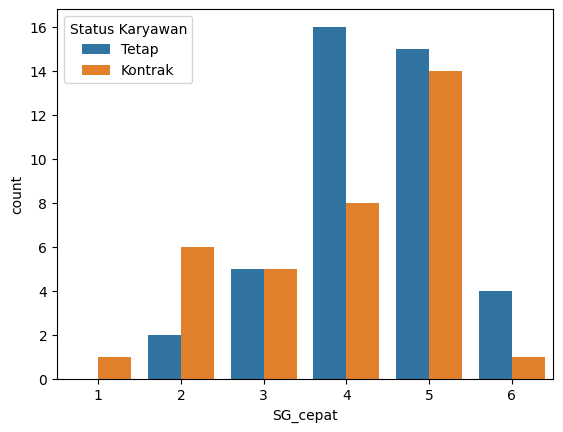

In [14]:
# Slip Gaji
sns.countplot(x='SG_cepat', hue='Status Karyawan', data=analisis)

Berdasarkan grafik diatas dapat disimpulkan bahwa karyawan kontrak merasa respon HRD terkait slip gaji kurang cepat

<Axes: >

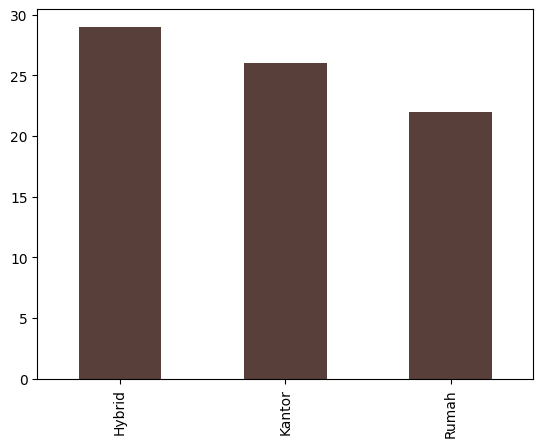

In [15]:
colors = ('#593F39')
analisis['Lokasi Kerja'].value_counts().plot(kind='bar', color = colors)

Berdasarkan grafik diatas, diperoleh bahwa karyawan PT. Dua Empat Tujuh paling banyak berada di divisi BSO dan paling sedikit pada divisi KMO dan DSO. Grafik diatas merupakan hasil proporsi dari stratified random sampling, jadi hasil tidak sesuai dengan kondisi sebenarnya

<Axes: ylabel='Gender'>

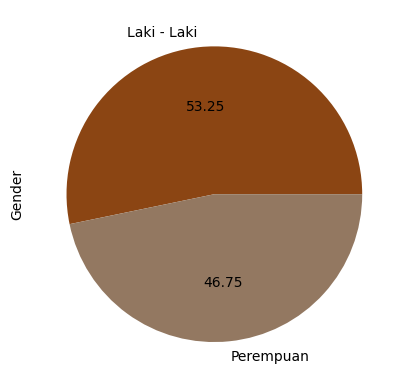

In [16]:
colors = ('#8B4513', '#937861')
analisis['Gender'].value_counts().plot(kind='pie', autopct='%.2f',colors=colors)

Berdasarkan grafik diatas, dapat dilihat bahwa Jumlah Karyawan Tetap lebih banyak dibandingkan karyawan kontrak

Worldcloud

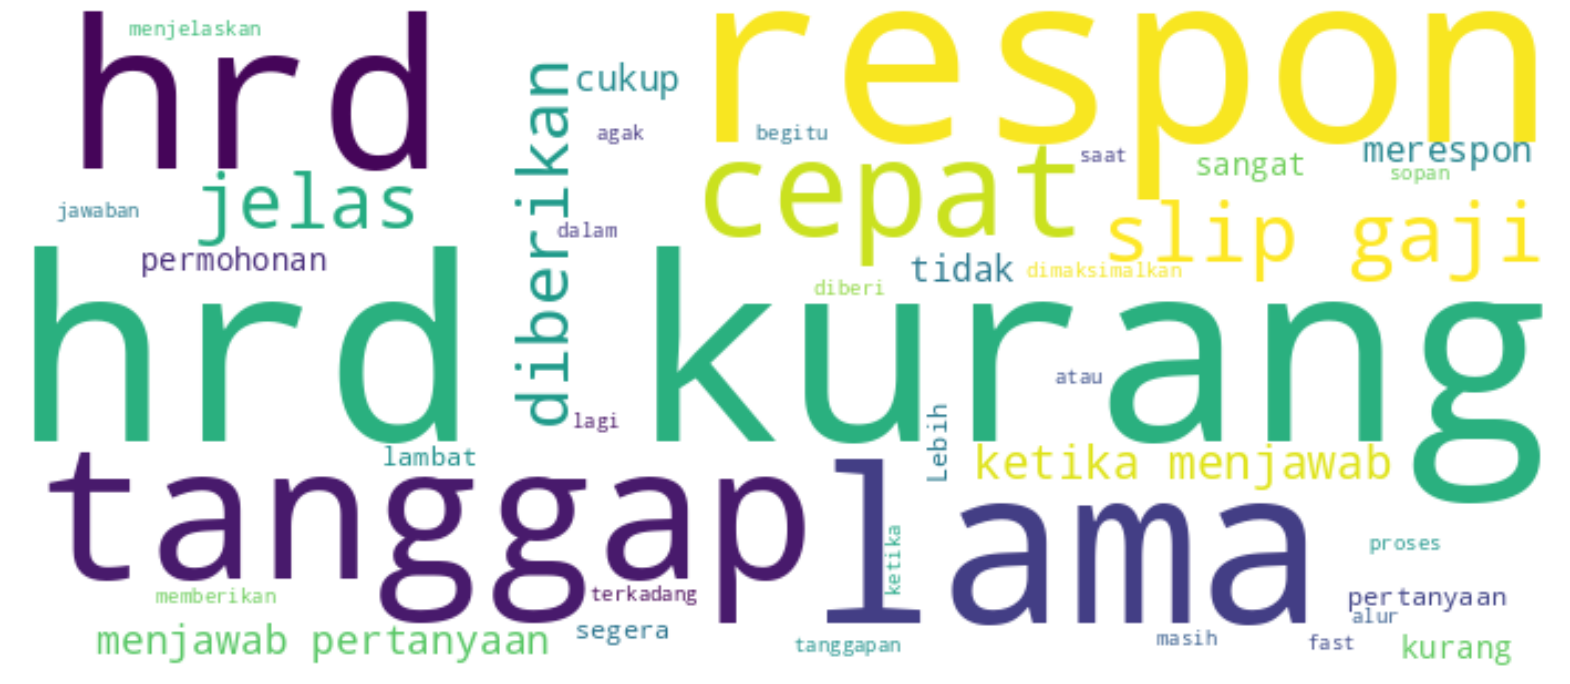

In [17]:
# Worldcloud Kritik Slip Gaji
all_words_lem = ' '.join([word for word in analisis['SG_kritik']])
wordcloud = WordCloud(background_color='white', width=700, height=300, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');


Berdasarkan output wordcloud, dapat dilihat bahwa kata-kata yang paling banyak muncul dalam kritik pelayanan slip gaji adalah, kurang, tanggap, lama, respon,hrd. Jadi, bisa disimpulkan bahwa karyawan merasa bahwa hrd kurang tanggap atau hrd lama respon.

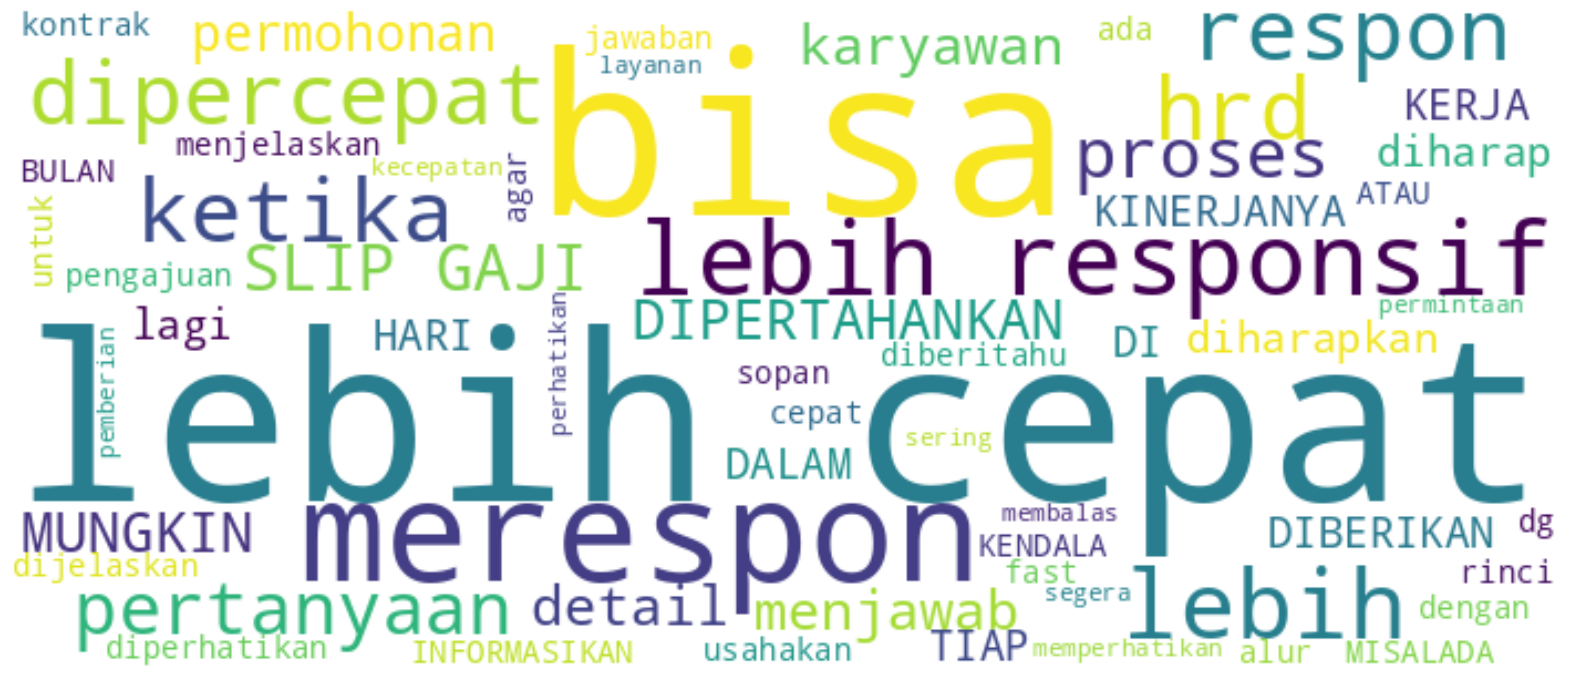

In [18]:
# Worldcloud Saran Slip Gaji
all_words_lem = ' '.join([word for word in analisis['SG_saran']])
wordcloud = WordCloud(background_color='white', width=700, height=300, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');


Berdasarkan output wordcloud, dapat dilihat bahwa kata-kata yang paling banyak muncul dalam saran pelayanan slip gaji adalah bisa, lebih, cepat. Jadi, bisa disimpulkan bahwa karyawan berharap agar HRD bisa lebih cepat ketika merespon pertanyaan atau permintaan.


Koreksi :

Untuk semua chart maupun wordcloudnya kasih penjelasan (analisisnya ya).

**Discriminant Analysis**

In [19]:
X = LDA.iloc[:, 0:6] # data independent

y = LDA.rating # data dependent


Uji Normalitas

In [20]:
# Uji Normalitas
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(X)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.955, p=0.000
Sample does not look Gaussian (reject H0)


Dari output diatas didapatkan p=0 < alpha=0.05, maka H0 ditolak artinya data tidak berdistribusi normal

In [21]:
from pingouin import multivariate_normality
multivariate_normality(X,0.05)

HZResults(hz=68.4351850357319, pval=0.0, normal=False)

Dari output diatas didapatkan p=0 < alpha=0.05, maka H0 ditolak artinya data tidak berdistribusi normal

Uji Homogenitas

In [22]:
pg.box_m(data, dvs=['SG_skor', 'PSC_skor', 'PK_skor', 'RM_skor', 'RP_skor', 'SO_skor'], group='rating')

,Chi2,df,pval,equal_cov
box,24.97834,21.0,0.248103,True


Berdasarkan uji kesetaraan matriks kovarians menggunakan uji Box's M, didapatkan pvalue=0.248 > alpha=0.05 dan equal_cov = True artinya data memiliki kovarians yg sama

Koreksi :

Silahkan dilanjutkan dulu ya.

Ini yang dari pingouin ya. Silahkan penamaan variabelnya kalian sesuaikan. Jangan lupa import pingouin as pg

pg.box_m(df, dvs=['SG_skor', 'PSC_skor', 'PK_skor',
       'RM_skor', 'RP_skor', 'SO_skor'], group='rating')

Uji Korelasi

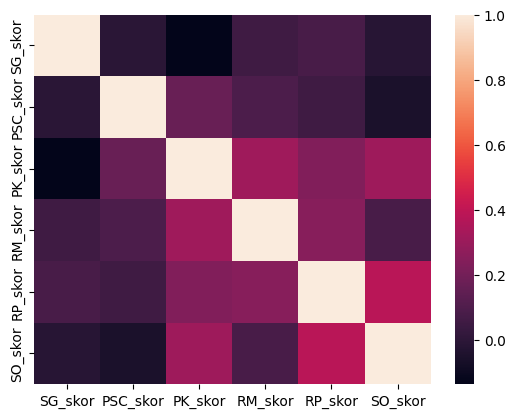

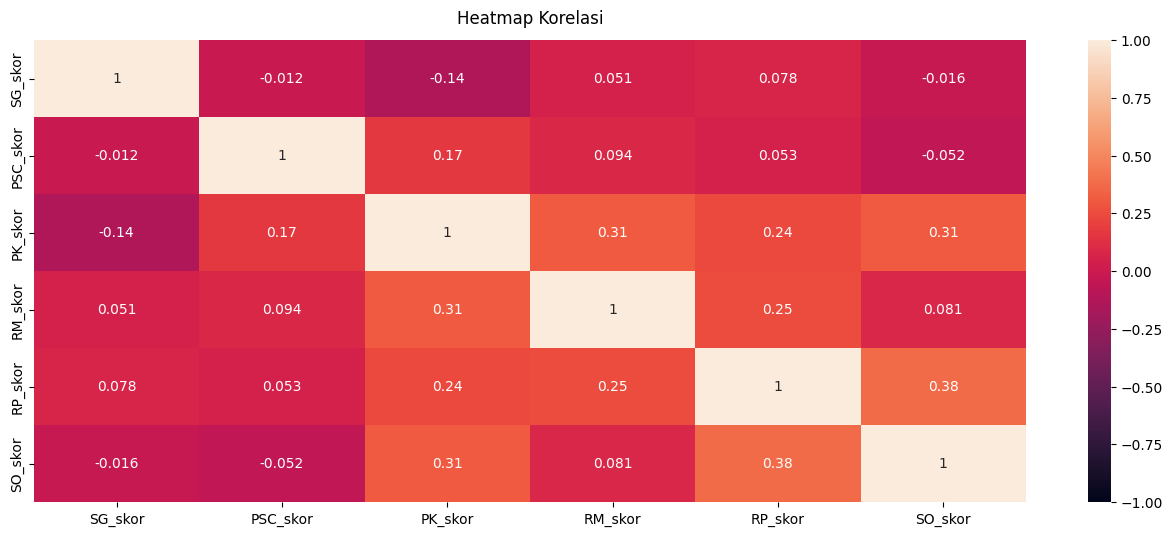

In [23]:
X.corr
sns.heatmap(X.corr());
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Heatmap Korelasi', fontdict={'fontsize':12}, pad=12);

Berdasarkan output heatmap diatas, dapat dilihat bahwa korelasi paling tinggi sebesar 0.094 artinya PSC_skor dengan RM_skor memiliki korelasi sangat kuat.

Deteksi dan Menghapus Outlier

<Axes: >

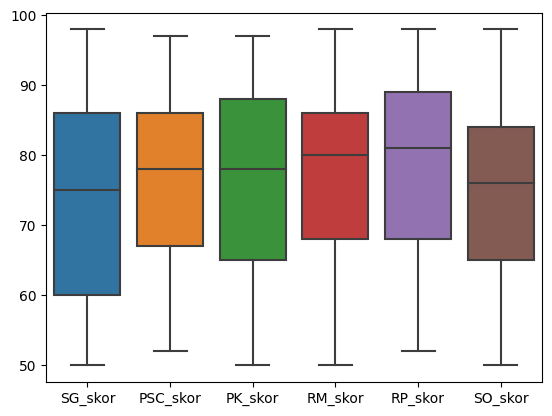

In [24]:
sns.boxplot(LDA)

In [25]:
def boxplot(columns):

  sns.boxplot(data=LDA,y=LDA[f"{columns}"])
  plt.title(f"Boxplot of HR Analytics {columns}")


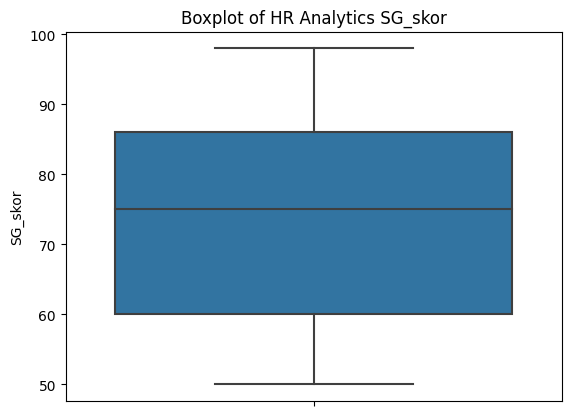

In [26]:
boxplot('SG_skor')

Berdasarkan boxplot diatas, dapat dilihat bahwa tidak terdapat pencilan/outlier pada data skor slip gaji

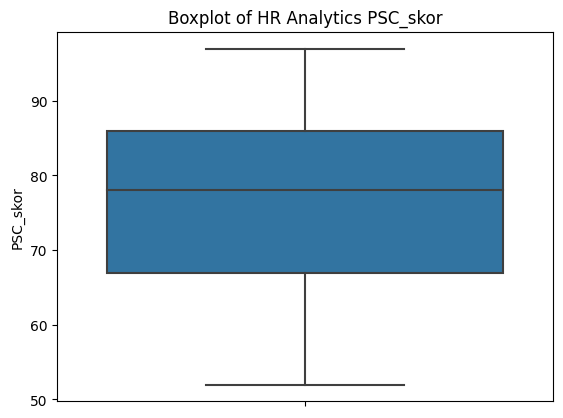

In [27]:
boxplot('PSC_skor')

Berdasarkan boxplot diatas, dapat dilihat bahwa tidak terdapat pencilan/outlier pada data skor pengajuan sisa cuti

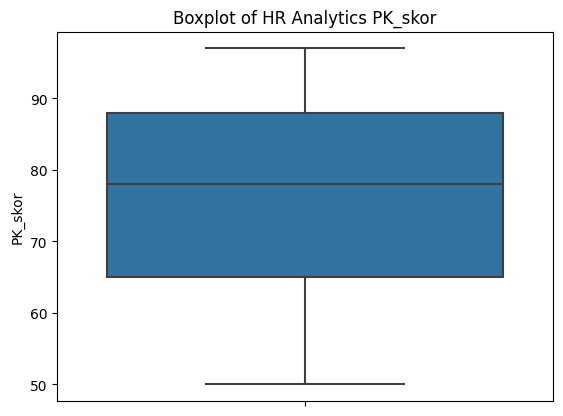

In [28]:
boxplot('PK_skor')

Berdasarkan boxplot diatas, dapat dilihat bahwa tidak terdapat pencilan/outlier pada data skor perpanjangan kontrak

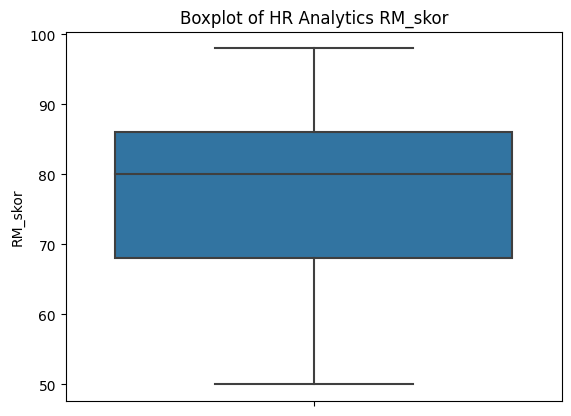

In [29]:
boxplot('RM_skor')

Berdasarkan boxplot diatas, dapat dilihat bahwa tidak terdapat pencilan/outlier pada data skor reimburse medical

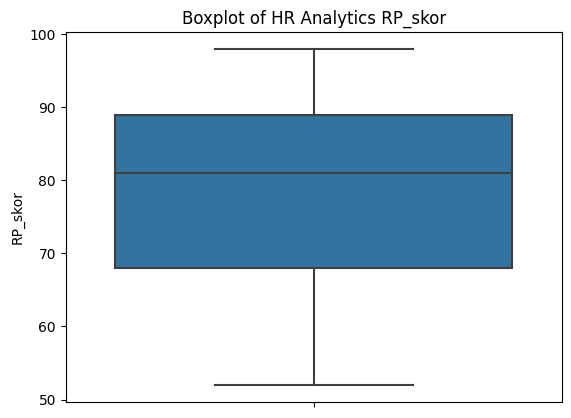

In [30]:
boxplot('RP_skor')

Berdasarkan boxplot diatas, dapat dilihat bahwa tidak terdapat pencilan/outlier pada data skor reset password chanthel dan email kantor

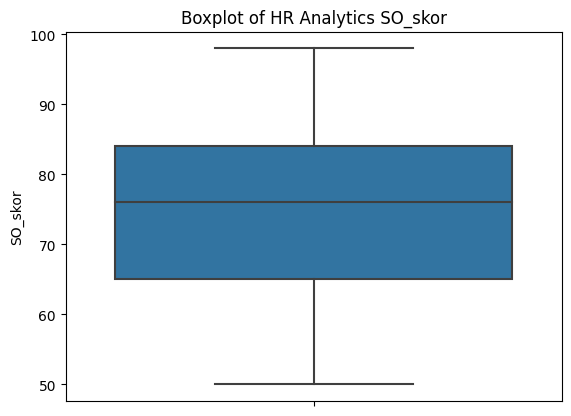

In [31]:
boxplot('SO_skor')

Berdasarkan boxplot diatas, dapat dilihat bahwa tidak terdapat pencilan/outlier pada data skor sosialisasi

**Estimasi Fungsi LDA**

Group Means

In [32]:
X.apply(np.mean)

SG_skor     73.649351
PSC_skor    75.831169
PK_skor     76.363636
RM_skor     77.480519
RP_skor     78.519481
SO_skor     74.142857
dtype: float64

In [33]:
X.apply(np.std)

SG_skor     13.999783
PSC_skor    12.263771
PK_skor     13.759445
RM_skor     11.828439
RP_skor     13.456626
SO_skor     12.495936
dtype: float64

In [34]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [52]:
printMeanAndSdByGroup(X, y)

## Means:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,SG_skor,PSC_skor,PK_skor,RM_skor,RP_skor,SO_skor
rating,,,,,,
Puas,77.000000,78.458333,81.645833,80.979167,84.041667,78.979167
Tidak Puas,68.103448,71.482759,67.620690,71.689655,69.379310,66.137931



## Standard deviations:


,SG_skor,PSC_skor,PK_skor,RM_skor,RP_skor,SO_skor
rating,,,,,,
Puas,12.637576,10.939147,11.023629,9.915244,9.721022,11.016067
Tidak Puas,14.377532,13.074378,13.376288,12.448801,13.797585,10.533114



## Sample sizes:


,0
rating,
Puas,48
Tidak Puas,29



Berdasarkan nilai Groups means bahwa variabel SG_skor, PSC_skor, PK_skor, RP_skor, dan SO_skor masing-masing  memiliki nilai mean yang berbeda antara rating “Puas” dan “Tidak Puas”, sehingga dapat dikatakan bahwa kedua variabel tersebut dapat mempengaruhi penilaian seorang karyawan terhadap kinerja layanan yang diberikan HRD.

Signifikansi

In [51]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(LDA['SO_skor'], LDA['rating'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Puas,Tidak Puas,-12.8412,0.0,-17.9858,-7.6967,True


Coefficient of LDA

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis().fit(X, y)

In [38]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

pretty_scalings_ = pretty_scalings(lda, X, out=True)

Coefficients of linear discriminants:


,LD1
SG_skor,-0.048606
PSC_skor,-0.036824
PK_skor,-0.044326
RM_skor,-0.028358
RP_skor,-0.040773
SO_skor,-0.051725


Berdasarkan pemodelan tersebut, diperoleh fungsi diskriminan
Y = -0.05 SG_skor - 0.04 PSC_skor - 0.04 PK_skor - 0.03 RM_skor - 0.04 RP_skor - 0.05 SO_skor


**Implementasi dan Prediksi**

Mean Accuracy

In [39]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
from sklearn.model_selection import cross_val_score
# evaluate model
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.873 (0.103)


Accuracy Score dari Klasifikasi (Training Data dan Testing Data)

In [40]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=0)

In [41]:
# LDA applied to train data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
predictions_lda = lda.predict(X_test)

In [42]:
# Print Accuracy Score for LDA
print("Accuracy Score is:")
print(accuracy_score(y_test, predictions_lda))
print()

Accuracy Score is:
0.9375



In [43]:
# Classification Report of Prediction
print("Classification Report:")
print(classification_report(y_test, predictions_lda))

Classification Report:
              precision    recall  f1-score   support

        Puas       1.00      0.92      0.96        12
  Tidak Puas       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16



Kesimpulan

Berdasarkan hasil klasifikasi diperoleh nilai tingkat keakuratan sebesar 0.94%